In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

housing = pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0)


In [2]:
pd.set_option('display.max_columns', 82)
pd.set_option('display.max_row', 10)
housing.head(10)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
6,908128060,1922,198500,85,RL,64.0,7301,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,495,1427,0,0.0,0.0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2.0,672.0,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal
7,902135020,936,93000,20,RM,60.0,6000,Pave,Pave,Reg,Bnk,AllPub,Inside,Mod,OldTown,Norm,Norm,2fmCon,1Story,4,4,1953,1953,Gable,CompShg,MetalSd,MetalSd,None,0.0,Fa,TA,CBlock,Fa,TA,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,TA,N,SBrkr,936,0,0,0.0,0.0,1,0,2,1,TA,4,Min2,0,NaN,Detchd,1974.0,Unf,2.0,576.0,TA,TA,Y,0,32,112,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
8,528228540,1246,187687,20,RL,53.0,3710,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,WdShing,Wd Shng,BrkFace,20.0,Gd,TA,PConc,Gd,TA,Gd,Unf,0.0,Unf,0.0,1146.0,1146.0,GasA,Ex,Y,SBrkr,1246,0,0,0.0,0.0,2,0,2,1,Gd,5,Typ,1,Gd,Attchd,2007.0,Fin,2.0,428.0,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,3,2008,New,Partial
9,923426010,889,137500,20,RL,74.0,12395,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,6,1984,1984,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,647.0,Unf,0.0,217.0,864.0,GasA,TA,Y,SBrkr,889,0,0,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1984.0,Unf,2.0,484.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
10,

In [3]:
housing['PriceSqft'] = housing.SalePrice/housing.GrLivArea

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

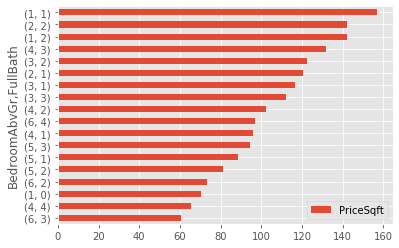

In [4]:
df1 = housing[['BedroomAbvGr', 'FullBath', 'PriceSqft']]
df2 = df1.loc[df1.BedroomAbvGr >=1]
df2 =df2.groupby(['BedroomAbvGr', 'FullBath']).agg({'PriceSqft':'median'})
df2.sort_values(by='PriceSqft').plot(kind='barh')

In [5]:
#Exclude houses with 0
housing = housing.loc[housing.BedroomAbvGr >=1]
housing['diff_']= np.abs(housing.BedroomAbvGr - housing.FullBath).apply(lambda x :"diff(<=1)" if x <= 1 else "diff(>1)")


Text(0.5, 1.0, 'Price per Square Foot ')

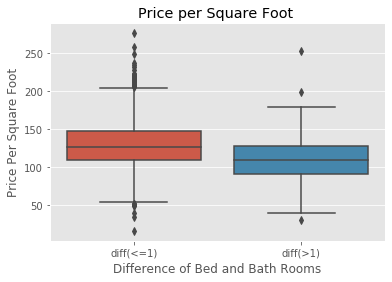

In [6]:

sns.boxplot(x='diff_', y='PriceSqft', data=housing)
plt.ylabel('Price Per Square Foot')
plt.xlabel('Difference of Bed and Bath Rooms')
plt.title('Price per Square Foot ')


In [7]:
#Houses with bed bath combo diff of 1 or less
housing.loc[housing.diff_ == 'diff(<=1)']['PriceSqft'].describe()

count    1542.000000
mean      128.905371
std        31.017037
min        15.371394
25%       109.310504
50%       126.092676
75%       147.658075
max       276.250881
Name: PriceSqft, dtype: float64

In [8]:
#Houses with bed bath combo diff of 2 or more
housing[housing.diff_ == 'diff(>1)']['PriceSqft'].describe()

count    1031.000000
mean      108.636229
std        25.455239
min        30.372058
25%        90.786165
50%       108.848315
75%       127.683033
max       253.031223
Name: PriceSqft, dtype: float64

In [9]:
#data for houses less than 1 diff
roomLess1 = housing.loc[housing.diff_ == 'diff(<=1)']['PriceSqft']


In [10]:
#data for houses more than 1
roomMore1 = housing.loc[housing.diff_ == 'diff(>1)']['PriceSqft']

We are conducting t-test to determine if the mean of bed and bath combination with a difference of 1 or less is significant
to the mean of bed and bath combination with a difference of 2 or more.

mean1 =128.91

mean2 = 108.64

Null hypothesis : There is no difference between two  means, mean1 != mean2

Alternative hypothesis : There is a difference between mean1 and mean2

We use signficance alpha of 5%.

Result:
t-statistic = 17.42
Pvalue = 2.37e-64

The pvalue is less than 5% so we reject the null hypothesis. There is a significant difference between the mean of bed and 
bath combination with a difference of 1 or less and mean of bed and bath combination with a difference of more than 1.





In [11]:
import scipy
scipy.stats.ttest_ind(roomLess1, roomMore1)

Ttest_indResult(statistic=17.423088153053715, pvalue=2.374246269921538e-64)

In [12]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [13]:
housing['bed_bath'] = housing['BedroomAbvGr'].apply(str).str.cat(housing['FullBath'].apply(str) , sep="-")
housing

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PriceSqft,diff_,bed_bath
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,...,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal,147.196262,diff(<=1),2-1
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,...,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,132.983794,diff(<=1),2-2
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,...,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,124.775225,diff(<=1),2-1
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,...,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal,109.720885,diff(<=1),2-1
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,...,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,136.336336,diff(<=1),3-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,...,N,FuseF,952,0,0,0.0,0.0,1,0,2,1,Fa,4,Typ,1,Gd,Detchd,1916.0,Unf,1.0,192.0,Fa,Po,P,0,98,0,0,40,0,NaN,NaN,NaN,0,5,2009,WD,Normal,127.100840,diff(<=1),2-1
760,905402060,1733,139600,20,RL,NaN,13680,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1955,1955,Hip,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,...,Y,FuseA,1733,0,0,0.0,0.0,2,0,4,1,TA,8,Min2,1,Gd,Attchd,1955.0,Unf,2.0,452.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,80.553953,diff(>1),4-2
761,909275030,2002,145000,90,RH,82.0,6270,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,1949,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,284.0,Unf,0.0,717.0,1001.0,...,N,F

In [14]:
housing2 = housing.copy()

In [15]:
df = housing2[['KitchenQual', 'PriceSqft']]
df.replace(['Po','Fa','TA','Gd','Ex'], ['Poor','Fair','Average','Good','Excellent'])

,KitchenQual,PriceSqft
1,Average,147.196262
2,Good,132.983794
3,Good,124.775225
4,Average,109.720885
5,Good,136.336336
...,...,...
759,Fair,127.100840
760,Average,80.553953
761,Average,72.427572
762,Good,118.078176


Text(0.5, 1.0, 'Kitchen Quality vs Price per Square Foot')

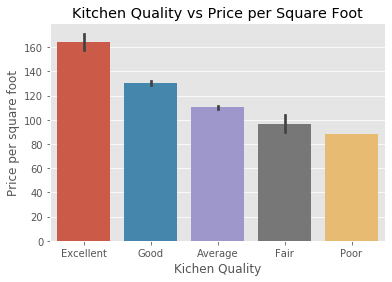

In [16]:
df = housing2[['KitchenQual', 'PriceSqft']]
df = df.replace(['Po','Fa','TA','Gd','Ex'], ['Poor','Fair','Average','Good','Excellent'])
sns.barplot(x='KitchenQual', y='PriceSqft', data=df, order = ['Excellent','Good','Average','Fair','Poor'])
plt.xlabel('Kichen Quality')
plt.ylabel('Price per square foot')
plt.title('Kitchen Quality vs Price per Square Foot')



Text(0.5, 1.0, 'Kitchen Quality vs Price per Square Foot')

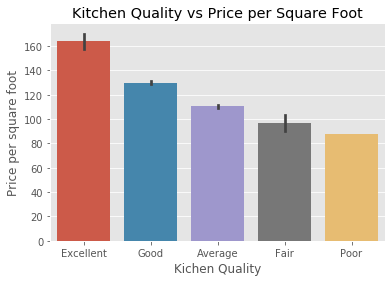

In [17]:
df = housing2[['KitchenQual', 'PriceSqft']]
df = df.replace(['Po','Fa','TA','Gd','Ex'], ['Poor','Fair','Average','Good','Excellent'])
sns.barplot(x='KitchenQual', y='PriceSqft', data=df, order = ['Excellent','Good','Average','Fair','Poor'])
plt.xlabel('Kichen Quality')
plt.ylabel('Price per square foot')
plt.title('Kitchen Quality vs Price per Square Foot')




Text(0.5, 1.0, 'Kitchen Quality vs Price per Square Foot')

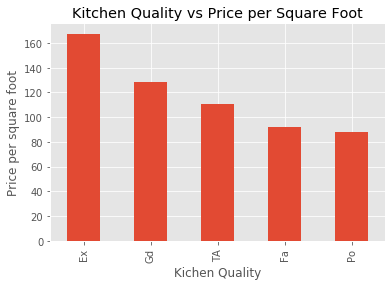

In [18]:
housing2.groupby('KitchenQual')['PriceSqft'].median().sort_values(ascending=False)\
.plot(kind='bar')
plt.xlabel('Kichen Quality')
plt.ylabel('Price per square foot')
plt.title('Kitchen Quality vs Price per Square Foot')

In [19]:
###################

housing2.loc[housing2.diff_ =='diff(<=1)'].groupby('KitchenQual')['PriceSqft'].median()

KitchenQual
Ex    179.203540
Fa    112.404726
Gd    133.125493
TA    114.710884
Name: PriceSqft, dtype: float64

In [20]:
###################
housing2.loc[housing2.diff_ =='diff(<=1)'].groupby('KitchenQual')['PriceSqft'].median()
###################
housing2.loc[housing2.diff_ =='diff(>1)'].groupby('KitchenQual')['PriceSqft'].median()

KitchenQual
Ex    134.741952
Fa     78.456433
Gd    113.093888
Po     87.826797
TA    105.937650
Name: PriceSqft, dtype: float64

In [21]:
housing.describe()

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,PriceSqft
count,2.573000e+03,2573.000000,2573.000000,2573.000000,2113.000000,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000,2559.000000,2572.000000,2572.000000,2572.000000,2572.000000,2573.000000,2573.000000,2573.000000,2571.000000,2571.000000,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000,2444.000000,2572.000000,2572.000000,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000
mean,7.147397e+08,1486.330742,177907.045472,57.658375,68.493611,10099.964244,6.043918,5.617956,1970.280606,1983.738049,99.527550,443.225894,52.676516,540.356532,1036.258942,1144.412748,337.661873,4.256121,0.431739,0.061844,1.554606,0.377380,2.858142,1.040031,6.393315,0.603964,1976.966039,1.746890,466.522551,95.355616,46.098717,23.277497,2.518072,16.157404,1.666537,48.630781,6.150019,2007.838710,120.783534
std,1.886586e+08,488.929150,74938.451564,42.803744,22.776730,8091.463162,1.366398,1.121238,29.747390,20.509447,176.045644,428.202864,173.003865,425.023831,418.560325,375.867739,424.326970,44.463434,0.514676,0.244127,0.541288,0.499052,0.810416,0.201932,1.532180,0.648434,24.685879,0.739039,207.506560,127.776748,66.113336,64.183549,25.327992,56.748933,30.380530,499.279397,2.671788,1.311521,30.571192
min,5.263011e+08,334.000000,12789.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,15.371394
25%,5.313630e+08,1112.000000,129900.000000,20.000000,57.000000,7415.000000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.000000,216.000000,791.750000,869.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,317.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,100.312256
50%,5.354542e+08,1436.000000,159900.000000,50.000000,68.000000,9382.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,384.000000,0.000000,449.000000,979.000000,1070.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,474.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,119.579501
75%,9.071811e+08,1733.000000,209500.000000,70.000000,80.000000,11479.000000,7.000000,6.000000,1999.000000,2003.000000,160.000000,732.000000,0.000000,784.000000,1266.000000,1364.000000,704.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2000.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,138.850575
max,1.007100e+09,4676.000000,755000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2288.000000,1526.000000,2336.000000,3206.000000,3820.000000,1872.000000,1064.000000,3.000000,2.000000,4.000000,2.000000,6.000000,3.000000,13.000000,4.000000,2010.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000,276.250881


In [22]:
housing.sample(3)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PriceSqft,diff_,bed_bath
496,902205010,612,45000,30,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,4,1940,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,BrkTil,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,...,N,FuseA,612,0,0,0.0,0.0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,1965.0,Unf,1.0,308.0,TA,Fa,N,0,0,25,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,73.529412,diff(<=1),1-1
220,909250210,1522,102000,50,RL,60.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,5,1926,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,1008.0,1008.0,...,Y,SBrkr,1008,0,514,0.0,0.0,2,0,4,1,TA,7,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,P,0,0,138,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,67.017083,diff(>1),4-2
382,534477270,1661,165500,80,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,6,6,1955,1996,Hip,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,831.0,Unf,0.0,161.0,992.0,...,Y,SBrkr,1661,0,0,1.0,0.0,1,0,3,1,Gd,8,Typ,1,TA,BuiltIn,1955.0,RFn,1.0,377.0,TA,TA,Y,0,28,0,0,178,0,NaN,MnPrv,NaN,0,10,2008,WD,Normal,99.638772,diff(>1),3-1


In [23]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [24]:
housing['Pool'] = housing.PoolArea.apply(lambda x : 1 if x>1 else 0)

In [25]:
housing.groupby('Pool')['PriceSqft'].mean()

Pool
0    120.768325
1    125.116514
Name: PriceSqft, dtype: float64

In [26]:
neighborhood = housing.groupby('Neighborhood')['PriceSqft'].mean().sort_values()

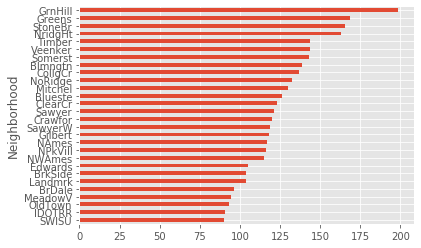

In [27]:
neighborhood.plot(kind='barh')

In [28]:
#pool.plot(kind='bar')

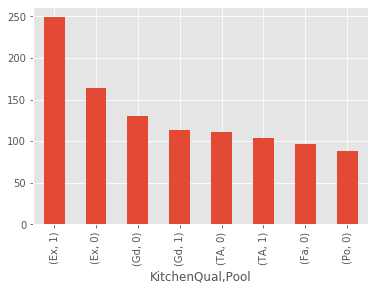

In [29]:
kitchen = housing.groupby(['KitchenQual','Pool'])['PriceSqft'].mean().sort_values(ascending=False)
kitchen.plot(kind='bar')

In [30]:
# Number of houses per neighborhood
neighborhoods = housing.groupby('Neighborhood').agg({'PID':'count'}).sort_values(by= 'PID', ascending=False).reset_index()
neighborhoods

,Neighborhood,PID
0,NAmes,410
1,CollgCr,236
2,OldTown,212
3,Edwards,165
4,Somerst,143
...,...,...
23,Veenker,22
24,Blueste,10
25,Greens,8
26,GrnHill,2


In [31]:
neighborhoods.loc[0]

Neighborhood    NAmes
PID               410
Name: 0, dtype: object

In [32]:
neighborhoods.iloc[-1]

Neighborhood    Landmrk
PID                   1
Name: 27, dtype: object

In [33]:
housing.shape #2580 houses, 81 columns/variables

(2573, 85)

In [34]:
#Average Price of House WITH Pool: $255,944.44(9 houses)
np.mean(housing.loc[~housing.PoolQC.isnull()].SalePrice)

255944.44444444444

In [35]:
#Average Price of house WITHOU Pool: $177,786.98  , 2571 Houses
np.mean(housing.loc[housing.PoolQC.isnull()].SalePrice)

177633.1232449298

In [36]:
#$106,814.60 is the average price of house WITHOUT garage
np.mean(housing.loc[housing.GarageCond.isnull()].SalePrice)

106814.6046511628

In [37]:
# 129 is the number of houses WITHOUT a garage
housing.loc[housing.GarageCond.isnull()].count()

PID              129
GrLivArea        129
SalePrice        129
MSSubClass       129
MSZoning         129
                ... 
SaleCondition    129
PriceSqft        129
diff_            129
bed_bath         129
Pool             129
Length: 85, dtype: int64

In [38]:
# 2451 is the number of houses WITH a garage
housing.loc[~housing.GarageCond.isnull()].count()

PID              2444
GrLivArea        2444
SalePrice        2444
MSSubClass       2444
MSZoning         2444
                 ... 
SaleCondition    2444
PriceSqft        2444
diff_            2444
bed_bath         2444
Pool             2444
Length: 85, dtype: int64

In [39]:
# $181809.36 is the average price of houses WITH a garage
np.mean(housing.loc[~housing.GarageCond.isnull()].SalePrice)

181659.4697217676

In [40]:
# the possible condition entries for a basement
housing.BsmtCond.unique()

array(['TA', nan, 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

In [41]:
# 69 is the number of houses without a base basement
housing.loc[housing.BsmtCond.isnull()].count()

PID              69
GrLivArea        69
SalePrice        69
MSSubClass       69
MSZoning         69
                 ..
SaleCondition    69
PriceSqft        69
diff_            69
bed_bath         69
Pool             69
Length: 85, dtype: int64

In [42]:
# $109,335.71 is the average price of house WITHOUT basement
np.mean(housing.loc[housing.BsmtCond.isnull()].SalePrice)

109335.71014492754

In [43]:
# 2511 is the number of houses WITH a basement
housing.loc[~housing.BsmtCond.isnull()].count()

PID              2504
GrLivArea        2504
SalePrice        2504
MSSubClass       2504
MSZoning         2504
                 ... 
SaleCondition    2504
PriceSqft        2504
diff_            2504
bed_bath         2504
Pool             2504
Length: 85, dtype: int64

In [44]:
# $179,948.09 is the average price of house WITH basement
np.mean(housing.loc[~housing.BsmtCond.isnull()].SalePrice)

179796.5910543131

In [45]:
housing.KitchenQual.unique()

array(['TA', 'Gd', 'Ex', 'Fa', 'Po'], dtype=object)

 # NEXT STEPS

## TARGET (y) --- SalePrice

#### CREATE A DATAFRAME WITH ONLY INDOOR FEATURES:

#Overall
'Neighborhood', 'OverallCond','YearBuilt','YearRemodAdd',

#Area/SquareFootage
'GrLivArea', '1stFlrSF' , '2ndFlrSF','LowQualFinSF',

#Number of BedRooms,TotalRooms,Kitchens, KitchenQuality
'BedroomAbvGr','TotRmsAbvGrd','KitchenAbvGr','KitchenQual',
'BsmtFullBath','BsmtHalfBath' ###SHOULD WE ADD THESE TO THE BATH TOTALS

#Bathrooms
'FullBath','HalfBath',

#Garage
'GarageType','GarageYrBlt','GarageFinish', 'GarageCars','GarageArea' ,'GarageQual','GarageCond',

#Basement
'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF',
                                                          'BsmtFinType2','BsmtFinSF2'

#'MSSubClass'#PROBABLY DELETE ##CATEGORIES OF HOUSES BASED ON LOTS OF THINGS
#'MSZoning' A	AgricultureC	Commercial FV	Floating Village Residential I	Industrial
#RH	Residential High Density, RL	Residential Low Density, RP	Residential Low Density Park, RM	Residential Medium Density


#BldgType ##1FAM, 2FM, DUPLEX, TOWNHOUSE END UNIT, TOWNHOUSE INSIDE UNIT

#'HouseStyle'  ##1STORY, 2STORY, FINISHED/UNFINISHED

#'Fireplaces','FireplaceQu', 'Functional'  ## FOR CATEGORY, ASSUME TYPICAL (UNLESS DEDUCTIONS)

Text(0.5, 1.0, 'Kitchen Quality  vs Price per Square Foot')

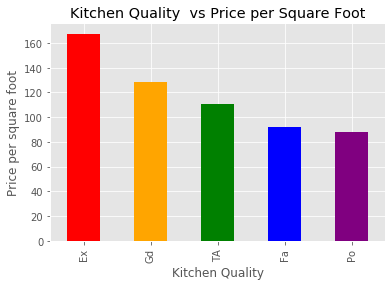

In [46]:
# Kitchen Quality Compared with Price per Square Foot

housing2.groupby('KitchenQual')['PriceSqft'].median().sort_values(ascending=False)\
.plot(kind='bar', color=['red', 'orange', 'green', 'blue', 'purple'])
plt.xlabel('Kitchen Quality')
plt.ylabel('Price per square foot')
plt.title('Kitchen Quality  vs Price per Square Foot')

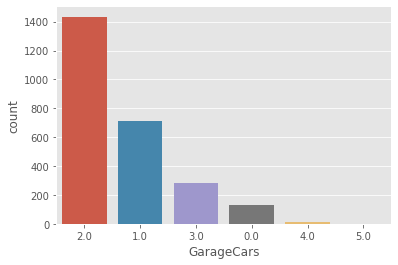

In [47]:
##NOT USED
# Count of Garages by Number of Cars
housing2 = housing2.sort_values('GarageCars')
sns.countplot(x = 'GarageCars', data = housing2,order = housing2['GarageCars'].value_counts().index)

Text(0.5, 1.0, 'Garage Number of Cars  vs Price per Square Foot')

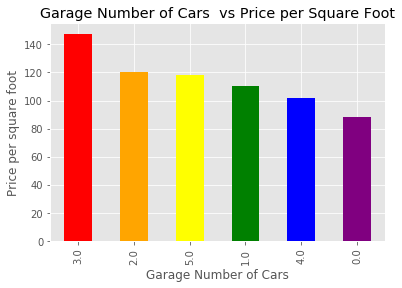

In [48]:
#Garage Size Compared with Price per Square Foot

housing2.groupby('GarageCars')['PriceSqft'].median().sort_values(ascending=False)\
.plot(kind='bar', color=['red', 'orange', 'yellow', 'green', 'blue', 'purple'])
plt.xlabel('Garage Number of Cars')
plt.ylabel('Price per square foot')
plt.title('Garage Number of Cars  vs Price per Square Foot')

In [49]:
# SEPARATE DATASETS BY DIFFERENCE BETWEEN BED&BATH
housing2 = housing2.replace(['Po','Fa','TA','Gd','Ex'], ['Poor','Fair','Average','Good','Excellent'])
diff_1 = housing2.loc[housing2.diff_ == 'diff(<=1)']
diff_2 = housing2.loc[housing2.diff_ == 'diff(>1)']

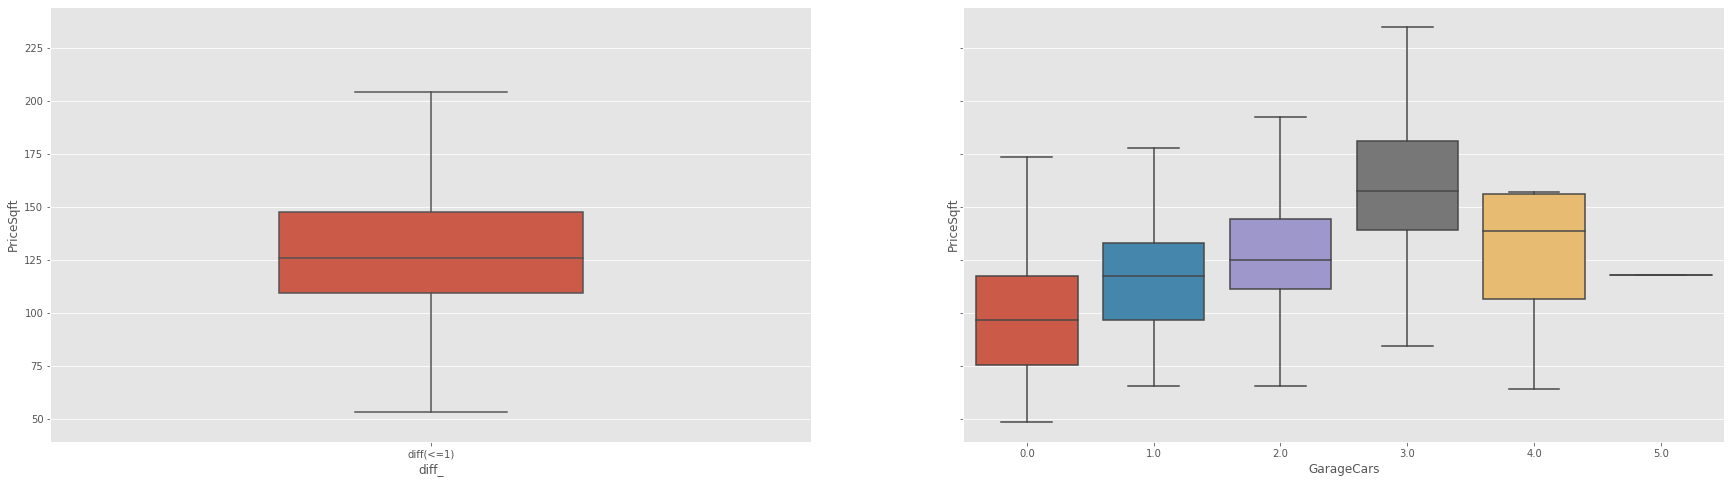

In [50]:
## 2 GRAPHS GARAGE LESS THAN OR EQUAL TO 1
diff_1 = housing2.loc[housing2.diff_ == 'diff(<=1)']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 8), sharey= True)
sns.boxplot(ax=axes[0], x='diff_', y='PriceSqft', showfliers=False, data=diff_1, width=0.4)
sns.boxplot(ax=axes[1], x='GarageCars', y='PriceSqft', showfliers=False ,data=diff_1)
plt.show()

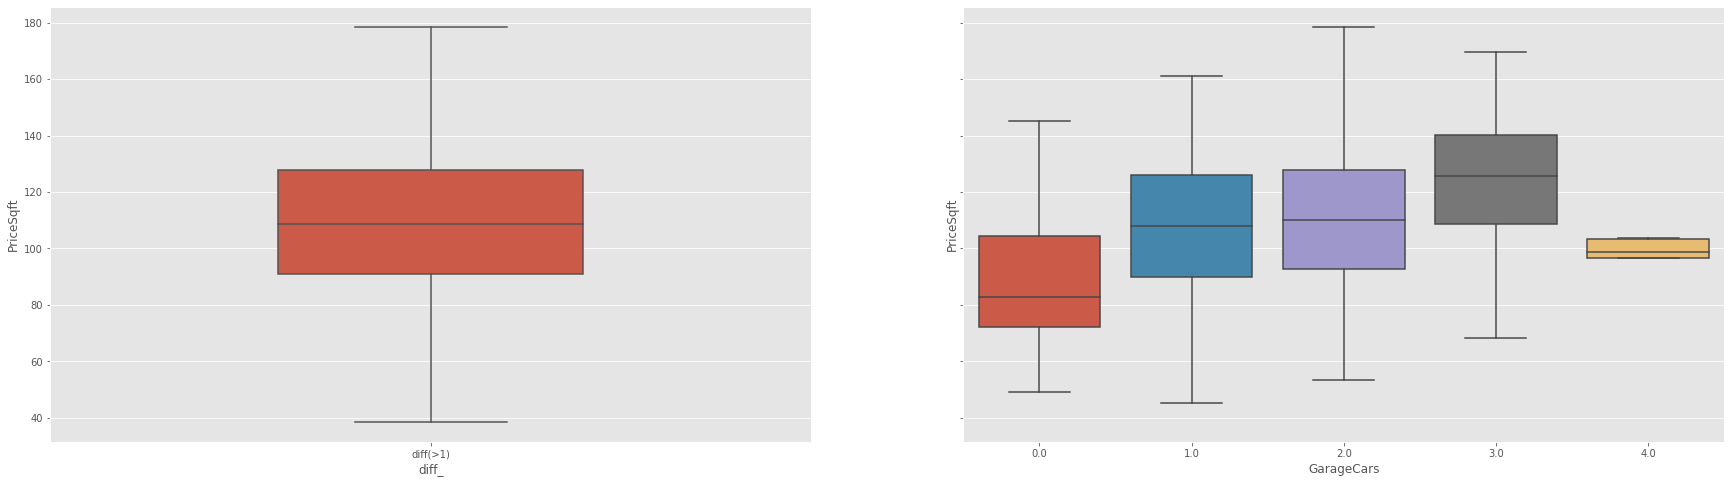

In [51]:
## 2 GRAPHS GARAGE GREATER THAN 1

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 8), sharey= True)
sns.boxplot(ax=axes[0], x='diff_', y='PriceSqft', showfliers=False, data=diff_2, width=0.4)
sns.boxplot(ax=axes[1], x='GarageCars', y='PriceSqft', showfliers=False ,data=diff_2)
plt.show()

# KITCHEN QUALITY

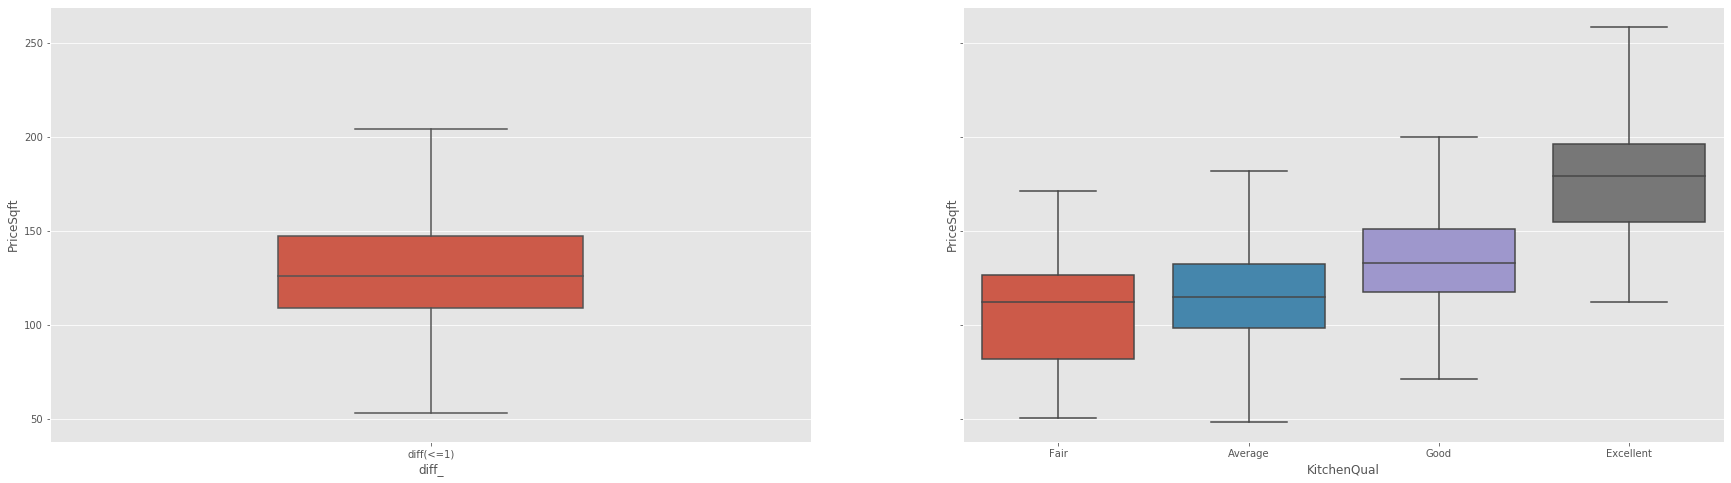

In [52]:
## 2 GRAPHS kitchen qual LESS THAN OR EQUAL TO 1
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 8), sharey= True)

sns.boxplot(ax=axes[0], x='diff_', y='PriceSqft', showfliers=False, data = diff_1, width=0.4)
sns.boxplot(ax=axes[1], x='KitchenQual', y='PriceSqft', showfliers=False , data = diff_1, order = ['Fair','Average','Good','Excellent'])

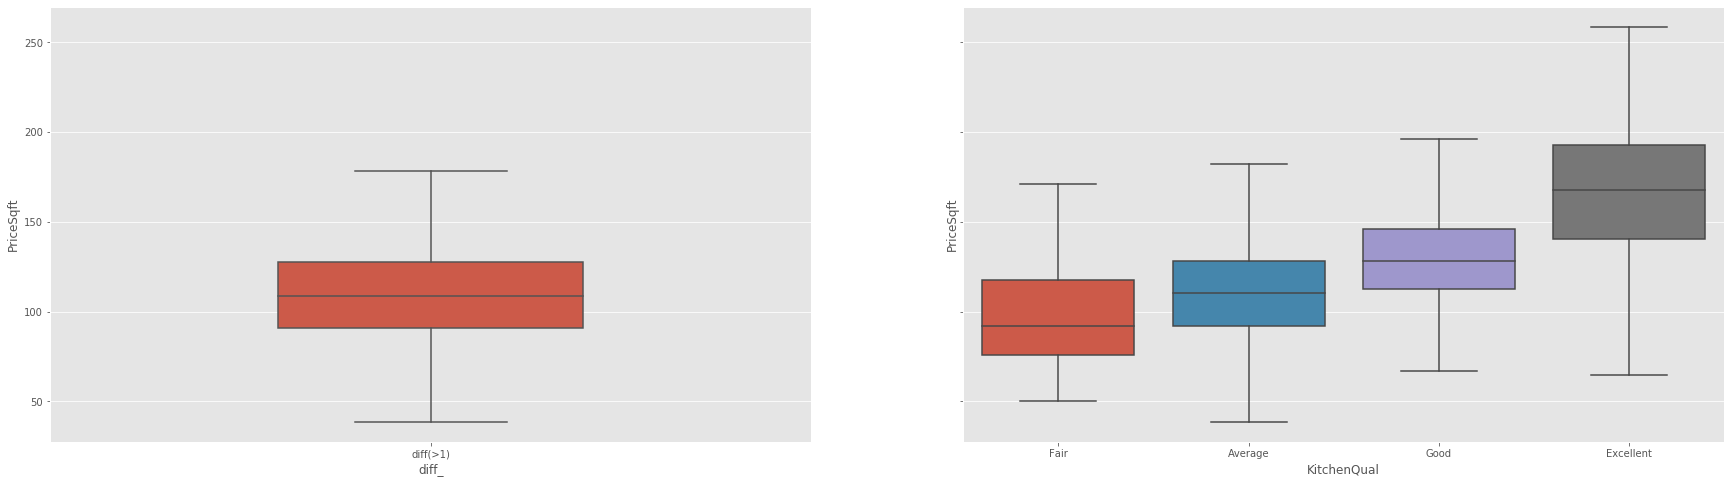

In [53]:
## 2 GRAPHS kitchen qual GREATER THAN 1
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 8), sharey= True)

sns.boxplot(ax=axes[0], x='diff_', y='PriceSqft', showfliers=False, data= diff_2, width=0.4)
sns.boxplot(ax=axes[1], x='KitchenQual', y='PriceSqft', showfliers=False , data = df, order = ['Fair','Average','Good','Excellent'])

In [54]:
# Create a dataframe with the 1 Deck column and the 4 Porch Columns
DeckPorch = housing[['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']]

In [55]:
# Average square footage for houses that have a deck or porch
DeckPorch.apply(lambda column: column.sum()/(column!=0).sum())

WoodDeckSF       197.862903
OpenPorchSF       84.361309
EnclosedPorch    146.080488
3SsnPorch        215.966667
ScreenPorch      184.768889
dtype: float64

In [56]:
#How many non-zero values in each Deck and Porch column
np.count_nonzero(DeckPorch, axis = 0)
# WoodDeckSF       1240
# OpenPorchSF      1406
# EnclosedPorch    410
# 3SsnPorch        30
# ScreenPorch      225

array([1240, 1406,  410,   30,  225])

In [57]:
#make copy of dataframe
housing3 = housing2.copy()

In [58]:
# WoodDeck and OpenPorch are the most popular columns
#Create 2 new columns with True/False for Woodeck and OpenPorch
housing3['has_WoodDeck'] = housing3['WoodDeckSF'] >0
housing3['has_OpenPorch'] = housing3['OpenPorchSF'] >0
housing3

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PriceSqft,diff_,bed_bath,has_WoodDeck,has_OpenPorch
290,902105060,1464,129000,70,RM,90.0,9900,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,5,8,1910,2002,Gable,CompShg,VinylSd,VinylSd,None,0.0,Good,Average,CBlock,Average,Average,No,Unf,0.0,Unf,0.0,504.0,504.0,...,764,700,0,0.0,0.0,2,0,3,1,Average,7,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,176,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal,88.114754,diff(<=1),3-2,False,False
648,905477010,1124,93000,20,RL,77.0,8335,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,5,1954,1954,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Average,Average,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,...,1124,0,0,0.0,0.0,1,0,3,1,Average,5,Min2,1,Good,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,36,190,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,82.740214,diff(>1),3-1,False,True
430,908203100,960,90000,20,RL,64.0,6410,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1958,1958,Hip,CompShg,WdShing,Wd Shng,None,0.0,Average,Average,CBlock,Average,Average,No,Unf,0.0,Unf,0.0,960.0,960.0,...,960,0,0,0.0,0.0,1,0,3,1,Average,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,93.750000,diff(>1),3-1,False,False
167,911175440,1396,115000,190,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,5,6,1951,1951,Gable,CompShg,WdShing,Wd Shng,None,0.0,Fair,Fair,CBlock,Average,Average,Mn,Unf,0.0,Unf,0.0,660.0,660.0,...,1060,336,0,0.0,0.0,2,0,4,2,Average,8,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,82.378223,diff(>1),4-2,False,False
201,923275140,833,112000,20,RL,NaN,8780,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,1985,1985,Gable,CompShg,HdBoard,Plywood,None,0.0,Average,Average,CBlock,Average,Average,No,ALQ,625.0,Unf,0.0,208.0,833.0,...,833,0,0,1.0,0.0,1,0,3,1,Average,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal,134.453782,diff(>1),3-1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,923202025,1368,215000,90,RM,78.0,7020,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,SFoyer,7,5,1997,1997,Gable,CompShg,MetalSd,MetalSd,BrkFace,200.0,Average,Good,PConc,Good,Average,Good,GLQ,1243.0,Unf,0.0,45.0,1288.0,...,1368,0,0,2.0,0.0,2,0,2,2,Average,8,Typ,0,NaN,Attchd,1997.0,Fin,4.0,784.0,Average,Average,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,157.163743,diff(<=1),2-2,False,True
957,906230010,2787,269500,90,RL,NaN,11855,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,2Story,7,5,2000,2000,Hip,CompShg,VinylSd,VinylSd,BrkFace,23.0,Average,Average,PConc,Excellent,Average,No,GLQ,820.0,Unf,0.0,348.0,1168.0,...,1168,1619,0,2.0,0.0,4,2,6,2,Average,8,Typ,2,Average,BuiltIn,2000.0,Fin,4.0,820.0,Average,Average,Y,312,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,96.698959,diff(>1),6-4,True,False
314,906225180,1440,224500,90

In [59]:
# change to integer values (if needed)

# housing3['has_OpenPorch'] = housing3['has_OpenPorch'].astype(int)
# housing3['has_WoodDeck'] = housing3['has_WoodDeck'].astype(int)

In [60]:
df3 =housing3.groupby(['has_OpenPorch', 'has_WoodDeck'])

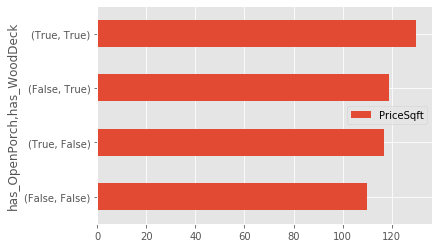

In [61]:
df3 =housing3.groupby(['has_OpenPorch', 'has_WoodDeck']).agg({'PriceSqft':'median'})
df3.sort_values(by='PriceSqft').plot(kind='barh')

In [62]:
# Creating a new column defining whether a house has both a deck and a porch
housing3['Deck_and_Porch']= housing3.has_OpenPorch & housing3.has_WoodDeck



In [63]:
housing3['Deck_and_Porch']

290    False
648    False
430    False
167    False
201    False
       ...  
951    False
957    False
314    False
563    False
434    False
Name: Deck_and_Porch, Length: 2573, dtype: bool

In [68]:
housing2[housing2.LotFrontage.isnull()]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PriceSqft,diff_,bed_bath
201,923275140,833,112000,20,RL,NaN,8780,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,1985,1985,Gable,CompShg,HdBoard,Plywood,None,0.0,Average,Average,CBlock,Average,Average,No,ALQ,625.0,Unf,0.0,208.0,833.0,...,Y,SBrkr,833,0,0,1.0,0.0,1,0,3,1,Average,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal,134.453782,diff(>1),3-1
655,527403120,858,88000,20,RL,NaN,8125,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,4,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,Average,Average,CBlock,Average,Average,No,BLQ,614.0,Unf,0.0,244.0,858.0,...,Y,SBrkr,858,0,0,0.0,0.0,1,0,3,1,Average,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,102.564103,diff(>1),3-1
234,904301375,904,61000,30,RL,NaN,10020,Pave,NaN,IR1,Low,AllPub,Inside,Sev,Edwards,Norm,Norm,1Fam,1Story,1,1,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fair,Fair,BrkTil,Fair,Poor,Good,BLQ,350.0,Unf,0.0,333.0,683.0,...,N,FuseA,904,0,0,1.0,0.0,0,1,1,1,Fair,4,Maj1,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal,67.477876,diff(<=1),1-0
428,905200160,1006,80000,20,RL,NaN,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,3,1959,1959,Gable,CompShg,Wd Sdng,Plywood,None,0.0,Average,Average,CBlock,Average,Average,No,GLQ,288.0,Unf,0.0,718.0,1006.0,...,Y,SBrkr,1006,0,0,0.0,0.0,1,0,3,1,Average,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,79.522863,diff(>1),3-1
151,909131125,1928,160000,190,RH,NaN,7082,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,2fmCon,2Story,5,8,1916,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,Average,Average,PConc,Average,Average,Mn,Unf,0.0,Unf,0.0,686.0,686.0,...,Y,SBrkr,948,980,0,0.0,0.0,2,0,5,2,Average,10,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,228,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,82.987552,diff(>1),5-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,527357180,2840,292500,60,RL,NaN,12511,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,2Story,7,7,1978,1978,Mansard,WdShake,Plywood,Plywood,BrkFace,168.0,Good,Average,PConc,Good,Average,No,ALQ,988.0,Unf,0.0,432.0,1420.0,...,Y,SBrkr,1420,1420,0,0.0,1.0,2,1,4,1,Good,8,Min2,2,Good,Attchd,1978.0,Fin,4.0,1314.0,Average,Good,Y,0,16,0,0,208,0,NaN,MnPrv,NaN,0,12,2008,WD,Normal,102.992958,diff(>1),4-2
625,906230020,2787,269500,90,RL,NaN,7939,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,2Story,7,5,2000,2000,Hip,CompShg,VinylSd,VinylSd,BrkFace,23.0,Average,Average,PConc,Excellent,Average,No,GLQ,820.0,Unf,0.0,348.0,1168.0,...,Y,SBrkr,1168,1619,0,2.0,0.0,4,2,6,2,Average,8,Typ,2,Average,BuiltIn,2000.0,Fin,4.0,820.0,Average,Average,Y,312,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,96.698959,diff(>1),6-4
370,923205025,1622,168000,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllP

In [74]:
x = housing[housing['LotFrontage'].isnull()]

In [75]:
x

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PriceSqft,diff_,bed_bath,Pool
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,...,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal,147.196262,diff(<=1),2-1,0
14,535105100,1394,159000,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609.0,Unf,0.0,785.0,1394.0,...,SBrkr,1394,0,0,1.0,0.0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2.0,514.0,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD,Normal,114.060258,diff(>1),3-1,0
19,534152050,1610,205000,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2001,Gable,CompShg,Plywood,Plywood,BrkFace,28.0,TA,TA,PConc,TA,TA,Mn,ALQ,1200.0,Unf,0.0,410.0,1610.0,...,SBrkr,1610,0,0,1.0,0.0,2,0,3,1,Gd,6,Typ,2,TA,Attchd,1977.0,RFn,2.0,480.0,TA,TA,Y,168,68,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal,127.329193,diff(<=1),3-2,0
28,533221090,1573,177500,160,FV,NaN,2117,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,6,5,2000,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,216.0,Gd,TA,PConc,Gd,TA,No,GLQ,378.0,Unf,0.0,378.0,756.0,...,SBrkr,769,804,0,0.0,0.0,2,1,3,1,Gd,5,Typ,0,NaN,Detchd,2000.0,Unf,2.0,440.0,TA,TA,Y,0,32,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,112.841704,diff(<=1),3-2,0
29,534128010,2090,200000,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,...,SBrkr,1107,983,0,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,95.693780,diff(<=1),3-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,527165100,1482,163900,80,RL,NaN,9125,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,BrkFace,170.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,...,SBrkr,812,670,0,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,1992.0,Fin,2.0,392.0,TA,TA,Y,100,25,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,110.593792,diff(<=1),3-2,0
747,535101110,1584,119000,90,RL,NaN,8917,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,5,1967,1967,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1584.0,1584.0,...,SBrkr,1584,0,0,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,Detchd,1967.0,Unf,2.0,506.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal,75.126263,diff(>1),4-2,0
759,903205040,952,121000,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952